# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Image Classification using Multi Layer Perceptron

**DISCLAIMER:** THIS NOTEBOOK IS PROVIDED ONLY AS A REFERENCE SOLUTION NOTEBOOK FOR THE MINI-PROJECT. THERE MAY BE OTHER POSSIBLE APPROACHES/METHODS TO ACHIEVE THE SAME RESULTS.

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition. 

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013. 

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

In [1]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

### Import Required packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

### Load the data

#### Get the features and labels of data

* Extract the features of the images
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [3]:
images_data = glob.glob("/content/FullIJCNN2013/*/*.ppm")
len(images_data), images_data[0]

(1213, '/content/FullIJCNN2013/03/00005.ppm')

In [4]:
features, labels = [], []
for i in images_data:
    try:
        img = Image.open(i)
        img = img.resize((30,30))#.reshape(30*30*3)
        labels.append(int(i.split("/")[3]))
        features.append(np.array(img))
    except:
        pass

In [5]:
features[0].shape

(30, 30, 3)

In [6]:
features1 = np.array([i.reshape(-1) for i in features])
features1.shape

(1213, 2700)

In [7]:
n_classes = len(set(labels))
n_classes

43

#### Plot the sample image of each class

Hint: plt.subplot

(80, 77, 3)

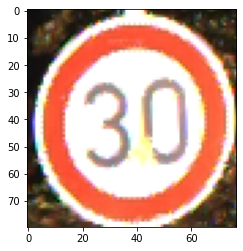

In [8]:
plt.imshow(imread('/content/FullIJCNN2013/01/00002.ppm'))
imread('/content/FullIJCNN2013/01/00002.ppm').shape

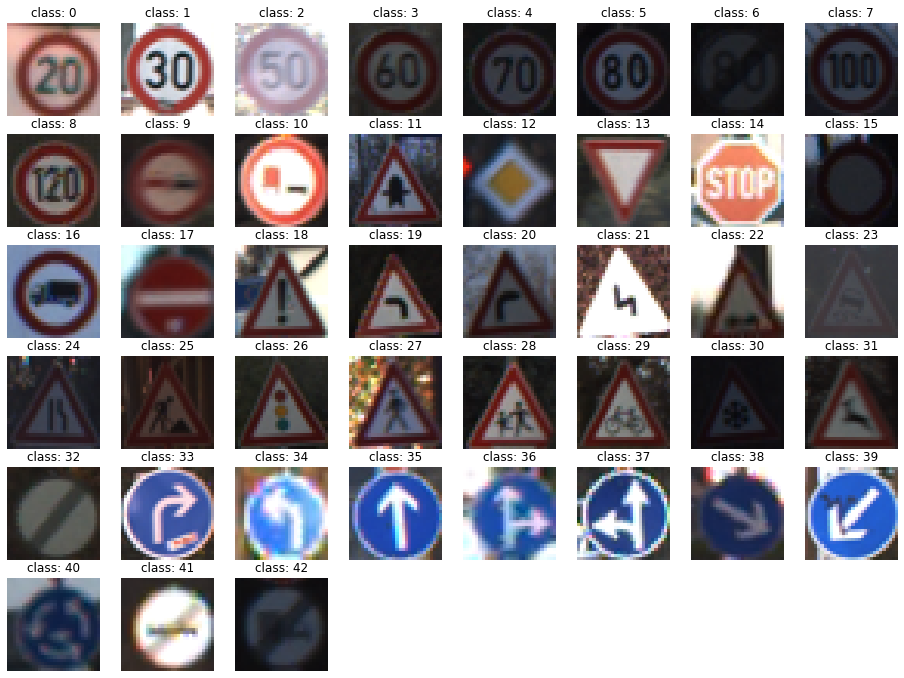

In [9]:
targets = np.array(labels)
plt.figure(figsize=(16, 16))
for c in range(n_classes):
    i = np.random.choice(np.where(targets == c)[0])
    plt.subplot(8, 8, c+1)
    plt.axis('off')
    plt.title('class: {}'.format(c))
    plt.imshow(features[i])

#### Plot the distribution of Classes

Text(0.5, 1.0, 'histogram')

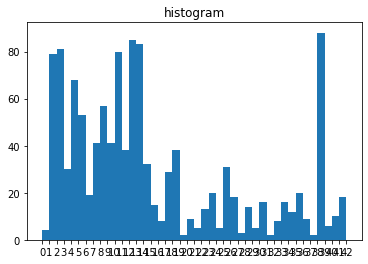

In [10]:
# Visulization of the histogram
images_per_class, bins, _ = plt.hist(labels,bins=range(n_classes))
plt.xticks(range(n_classes))
plt.title('histogram')

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [11]:
features_norm = preprocessing.normalize(features1, norm='l2')
features_norm.shape

(1213, 2700)

### Train the MLP classifier on features

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(features_norm), np.array(labels), test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((970, 2700), (243, 2700), (970,), (243,))

### Tune the hyper-parameters

* Use the GridSearchCV and select best parameters

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [13]:
mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(450,225,100,50), (100,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [14]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(450, 225, 100, 50),
                                                (100, 100, 50), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [15]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (450, 225, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [16]:
mlp = MLPClassifier(activation='tanh',momentum=0.99,alpha=0.0001,max_iter=1000,
                    hidden_layer_sizes=(450,225,100, 50),learning_rate='adaptive',solver='adam')
mlp.fit(X_train, Y_train)
mlp.score(X_test, Y_test)

0.8641975308641975

#### Classification report (only for internal purpose)

In [17]:
pred_test = mlp.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

           1       0.96      0.88      0.92        25
           2       0.85      0.94      0.89        18
           3       0.83      1.00      0.91         5
           4       0.94      1.00      0.97        15
           5       0.87      0.87      0.87        15
           6       1.00      1.00      1.00         3
           7       0.86      0.60      0.71        10
           8       0.64      0.82      0.72        11
           9       1.00      0.88      0.93         8
          10       1.00      0.95      0.97        19
          11       1.00      1.00      1.00         5
          12       0.95      1.00      0.98        21
          13       0.92      0.92      0.92        12
          14       0.83      1.00      0.91         5
          16       0.50      1.00      0.67         1
          17       1.00      1.00      1.00         8
          18       1.00      0.67      0.80         6
          19       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [18]:
metrics.confusion_matrix(Y_test, pred_test)

array([[22,  2,  1, ...,  0,  0,  0],
       [ 0, 17,  0, ...,  0,  0,  0],
       [ 0,  0,  5, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  2]])

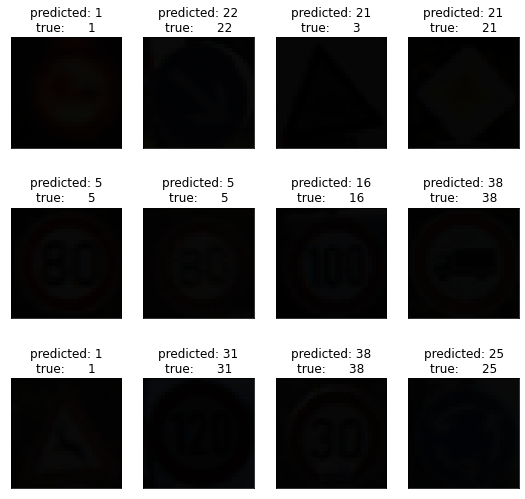

In [19]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w,3)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]]
    true_name = target_names[y_test[i]]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(pred_test, Y_test, Y_test, i)
                     for i in range(pred_test.shape[0])]

plot_gallery(X_test, prediction_titles, 30, 30)

#### Use RandomSearchCV to search the hyper parameters

In [20]:
import scipy.stats
from sklearn.model_selection import RandomizedSearchCV

mlp = MLPClassifier(early_stopping=True)
randomCV = RandomizedSearchCV(mlp,parameter_space)
search = randomCV.fit(X_train, Y_train)
search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (450, 225, 100, 50),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

#### Try the different algorithms and compare the results with MLP classifier

In [21]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [22]:
!pip install  xgboost
from xgboost import XGBClassifier

In [23]:
# Decision Tree
dt_model_team = tree.DecisionTreeClassifier(random_state=42)
dt_model_team = dt_model_team.fit(X_train, Y_train)
dt_model_team.score(X_test, Y_test), dt_model_team.score(X_train, Y_train)

(0.6337448559670782, 1.0)

In [24]:
# Random Forest
rf_model_team = RandomForestClassifier(max_depth=10, n_estimators=250,criterion='entropy',random_state=42)
rf_model_team.fit(X_train, Y_train)
rf_model_team.score(X_test, Y_test), rf_model_team.score(X_train, Y_train)

(0.8477366255144033, 1.0)

In [25]:
#Linear SVC
Lsvm = LinearSVC(random_state=0, tol=1e-5)
Lsvm.fit(X_train, Y_train)
Lsvm.score(X_test, Y_test)

0.7860082304526749

In [26]:
svm_clf = SVC(kernel="rbf",C=1.0)
svm_clf.fit(X_train, Y_train)
svm_clf.score(X_test, Y_test)

0.7037037037037037

In [27]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
xgb.score(X_test, Y_test)

0.831275720164609

### Implement simple Neural Networks using keras

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [28]:
print(tf.__version__) # 1.12.0

2.7.0


In [29]:
# Step 1 - Build the architecture
# Model a simple 3-layer neural network
nn_model = keras.Sequential([
    keras.layers.Flatten(input_shape=[2700]),
    keras.layers.Dense(1350, activation=tf.nn.relu),
    keras.layers.Dense(675, activation=tf.nn.relu),
    keras.layers.Dense(43, activation=tf.nn.softmax)
])
nn_model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2700)              0         
                                                                 
 dense (Dense)               (None, 1350)              3646350   
                                                                 
 dense_1 (Dense)             (None, 675)               911925    
                                                                 
 dense_2 (Dense)             (None, 43)                29068     
                                                                 
Total params: 4,587,343
Trainable params: 4,587,343
Non-trainable params: 0
_________________________________________________________________


In [30]:
np.array(X_train).shape, Y_train.shape, len(set(labels))

((970, 2700), (970,), 43)

In [31]:
# Step 2 - Compile the model
nn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
nn_model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
31/31 [==============================] - 2s 6ms/step - loss: 3.4025 - accuracy: 0.1093
Epoch 2/20
31/31 [==============================] - 0s 6ms/step - loss: 2.8771 - accuracy: 0.2485
Epoch 3/20
31/31 [==============================] - 0s 6ms/step - loss: 2.3094 - accuracy: 0.3588
Epoch 4/20
31/31 [==============================] - 0s 6ms/step - loss: 1.9532 - accuracy: 0.4196
Epoch 5/20
31/31 [==============================] - 0s 6ms/step - loss: 1.6372 - accuracy: 0.5165
Epoch 6/20
31/31 [==============================] - 0s 6ms/step - loss: 1.3892 - accuracy: 0.5887
Epoch 7/20
31/31 [==============================] - 0s 6ms/step - loss: 1.2160 - accuracy: 0.6062
Epoch 8/20
31/31 [==============================] - 0s 6ms/step - loss: 1.0584 - accuracy: 0.6711
Epoch 9/20
31/31 [==============================] - 0s 6ms/step - loss: 0.9595 - accuracy: 0.7021
Epoch 10/20
31/31 [==============================] - 0s 6ms/step - loss: 0.8332 - accuracy: 0.7340
Epoch 11/20
31/31 [

In [33]:
nn_model.evaluate(X_test, Y_test)

8/8 [==============================] - 0s 4ms/step - loss: 0.9716 - accuracy: 0.7737


[0.9715780019760132, 0.7736625671386719]

#### Try the same parameters used for MLP Classifier and build the keras model

In [34]:
nn_model = keras.Sequential([
    keras.layers.Flatten(input_shape=[2700]),
    keras.layers.Dense(450, activation=tf.nn.tanh),
    keras.layers.Dense(225, activation=tf.nn.tanh),
    keras.layers.Dense(100, activation=tf.nn.tanh),
    keras.layers.Dense(50, activation=tf.nn.softmax)
])
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
31/31 [==============================] - 1s 5ms/step - loss: 3.4252 - accuracy: 0.1113
Epoch 2/20
31/31 [==============================] - 0s 5ms/step - loss: 2.7407 - accuracy: 0.2969
Epoch 3/20
31/31 [==============================] - 0s 4ms/step - loss: 2.0739 - accuracy: 0.4402
Epoch 4/20
31/31 [==============================] - 0s 5ms/step - loss: 1.6805 - accuracy: 0.5237
Epoch 5/20
31/31 [==============================] - 0s 4ms/step - loss: 1.4190 - accuracy: 0.5918
Epoch 6/20
31/31 [==============================] - 0s 4ms/step - loss: 1.2284 - accuracy: 0.6649
Epoch 7/20
31/31 [==============================] - 0s 4ms/step - loss: 1.0340 - accuracy: 0.6990
Epoch 8/20
31/31 [==============================] - 0s 4ms/step - loss: 0.9141 - accuracy: 0.7433
Epoch 9/20
31/31 [==============================] - 0s 4ms/step - loss: 0.7693 - accuracy: 0.7969
Epoch 10/20
31/31 [==============================] - 0s 4ms/step - loss: 0.7569 - accuracy: 0.7845
Epoch 11/20
31/31 [

In [35]:
nn_model.evaluate(X_test, Y_test)

8/8 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.8230


[0.6914183497428894, 0.8230452537536621]

#### Experiment using Dropout, Regularization and Batch Normalization

In [36]:
# With Regularization and DropOut and BatchNormalization
nn_model = keras.Sequential([
    keras.layers.Flatten(input_shape=[2700]),
    keras.layers.Dense(1350, activation=tf.nn.relu,kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(675, activation=tf.nn.relu),
    Dropout(rate=0.1),
    BatchNormalization(),
    keras.layers.Dense(43, activation=tf.nn.softmax)
])

nn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
nn_model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
31/31 [==============================] - 1s 8ms/step - loss: 12.9290 - accuracy: 0.3784
Epoch 2/20
31/31 [==============================] - 0s 8ms/step - loss: 3.9306 - accuracy: 0.6598
Epoch 3/20
31/31 [==============================] - 0s 8ms/step - loss: 1.8888 - accuracy: 0.7526
Epoch 4/20
31/31 [==============================] - 0s 7ms/step - loss: 1.3972 - accuracy: 0.7918
Epoch 5/20
31/31 [==============================] - 0s 8ms/step - loss: 1.1926 - accuracy: 0.8227
Epoch 6/20
31/31 [==============================] - 0s 7ms/step - loss: 1.1429 - accuracy: 0.8134
Epoch 7/20
31/31 [==============================] - 0s 8ms/step - loss: 1.1616 - accuracy: 0.8175
Epoch 8/20
31/31 [==============================] - 0s 7ms/step - loss: 1.0744 - accuracy: 0.8433
Epoch 9/20
31/31 [==============================] - 0s 7ms/step - loss: 0.9407 - accuracy: 0.8577
Epoch 10/20
31/31 [==============================] - 0s 7ms/step - loss: 0.8584 - accuracy: 0.8773
Epoch 11/20
31/31 

In [37]:
nn_model.evaluate(X_test, Y_test)

8/8 [==============================] - 0s 4ms/step - loss: 1.4751 - accuracy: 0.7119


[1.4750746488571167, 0.7119341492652893]

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any. 
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

In [38]:
predict_test = nn_model.predict(X_test)
predict_test = np.argmax(predict_test,axis=1)
predict_test

array([10, 38, 20, 12,  5,  5,  8, 16, 24,  8,  1, 18,  2,  4, 26,  5, 38,
        2,  8, 12,  7, 18, 10,  1, 38,  4,  2, 11, 13,  3, 11,  1, 13, 17,
       24,  2, 10,  1, 18,  2, 18,  5, 24,  4,  1, 38, 17, 10,  8,  4, 38,
        8,  2, 38,  8,  1,  4, 35, 38,  1, 26, 10, 10,  5, 12,  4,  1, 12,
       10,  2,  4,  2, 20, 12, 11, 18, 12,  4, 18,  2, 26,  4,  5, 10,  2,
       14, 17, 17, 38, 22, 20,  4,  2, 10, 12, 18, 13, 14,  8,  8, 18, 23,
        2,  2, 38, 14, 17, 20,  9,  9, 18,  9,  4, 17,  8, 13, 18, 18, 14,
       12, 38,  1, 11, 18,  2, 18, 18, 18,  9,  2, 24, 10, 12, 13, 18,  2,
       17,  8, 26, 18, 12, 18,  2, 13,  4, 10, 12,  1,  2,  2,  8,  4, 10,
       10, 10,  8, 18, 18,  4, 10, 18,  8, 13, 12,  4,  8, 38, 24, 18,  4,
       18,  2, 38, 13,  1, 24,  4, 18, 18, 22,  9,  2,  9, 33,  9, 22, 22,
       12,  1,  2,  2, 14,  2,  5,  8,  4, 24,  5,  4, 38, 17,  1,  2, 18,
        8, 35,  8,  8, 24, 12, 18,  1, 10, 12,  2,  5, 25,  2, 12, 20,  8,
        5,  2,  1,  8, 12

In [39]:
metrics.confusion_matrix(Y_test, predict_test)

array([[17,  6,  0, ...,  0,  0,  0],
       [ 0, 17,  0, ...,  0,  0,  0],
       [ 0,  3,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [40]:
print(metrics.classification_report(Y_test, predict_test))

              precision    recall  f1-score   support

           1       1.00      0.68      0.81        25
           2       0.57      0.94      0.71        18
           3       1.00      0.20      0.33         5
           4       0.74      0.93      0.82        15
           5       1.00      0.73      0.85        15
           6       0.00      0.00      0.00         3
           7       1.00      0.20      0.33        10
           8       0.50      0.91      0.65        11
           9       0.89      1.00      0.94         8
          10       1.00      0.95      0.97        19
          11       1.00      1.00      1.00         5
          12       1.00      0.81      0.89        21
          13       1.00      0.75      0.86        12
          14       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         8
          18       0.20      1.00      0.33         6
          19       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.